# Data analysis  

In [6]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sqlalchemy import create_engine
USER = "tim"
PASSWORD = "Ylu3shin123!!"
URI = "dbbikes.cjlp5umzs5hs.us-east-1.rds.amazonaws.com"
PORT = "3306"
DB = "dbbikes"
engine = create_engine("mysql+pymysql://{}:{}@{}:{}/{}".format(USER, PASSWORD, URI, PORT, DB), echo=True)

### Bike Availability

In [8]:
sql = f"""
SELECT id, number, last_update, available_bikes, available_bike_stands FROM stations
GROUP BY id, day(last_update)
ORDER by id, last_update ASC;
"""

In [9]:
bike_df = pd.read_sql_query(sql, engine)

2021-04-13 16:41:16,190 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-04-13 16:41:16,196 INFO sqlalchemy.engine.base.Engine {}
2021-04-13 16:41:16,314 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-04-13 16:41:16,314 INFO sqlalchemy.engine.base.Engine {}
2021-04-13 16:41:16,702 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-04-13 16:41:16,703 INFO sqlalchemy.engine.base.Engine {}
2021-04-13 16:41:17,006 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-04-13 16:41:17,007 INFO sqlalchemy.engine.base.Engine {}
2021-04-13 16:41:17,133 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-04-13 16:41:17,135 INFO sqlalchemy.engine.base.Engine {}
2021-04-13 16:41:17,313 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-04-13 16:41:17,314 INFO sqlalchemy.engine.base.E

#### Converting datatypes

In [10]:
bike_df['last_update'] = bike_df['last_update'].astype('datetime64[ns]')

#from datetime import datetime
bike_df['last_update'] = pd.to_datetime(bike_df['last_update'])

#bike_df.last_update = datetime.utcfromtimestamp(bike_df.last_update).strftime('%Y-%m-%d %H:%M:%S')
bike_df  

,id,number,last_update,available_bikes,available_bike_stands
0,1,42,2021-03-16 19:32:50,23,7
1,2,30,2021-03-16 19:26:54,4,16
2,3,54,2021-03-16 19:28:27,3,30
3,4,108,2021-03-16 19:29:25,23,17
4,5,56,2021-03-16 19:34:39,6,34
...,...,...,...,...,...
816244,816245,39,2021-04-13 15:38:52,3,17
816245,816246,83,2021-04-13 15:38:17,19,20
816246,816247,92,2021-04-13 15:36:42,12,28
816247,816248,21,2021-04-13 15:35:57,11,19


In [11]:
bike_df.dtypes

id                                int64
number                            int64
last_update              datetime64[ns]
available_bikes                   int64
available_bike_stands             int64
dtype: object

In [12]:
bike_df.shape

(816249, 5)

In [13]:
bike_df.tail()

,id,number,last_update,available_bikes,available_bike_stands
816244,816245,39,2021-04-13 15:38:52,3,17
816245,816246,83,2021-04-13 15:38:17,19,20
816246,816247,92,2021-04-13 15:36:42,12,28
816247,816248,21,2021-04-13 15:35:57,11,19
816248,816249,88,2021-04-13 15:37:03,20,10


### Weather

In [14]:
sql = f"""

SELECT * FROM weather

"""

In [15]:
weather_df = pd.read_sql_query(sql, engine)

2021-04-13 16:41:42,398 INFO sqlalchemy.engine.base.OptionEngine 

SELECT * FROM weather


2021-04-13 16:41:42,400 INFO sqlalchemy.engine.base.OptionEngine {}


In [16]:
weather_df.dtypes

id                              int64
description                    object
temp                          float64
last_update_weather    datetime64[ns]
dtype: object

#### Converting datatypes

In [17]:
# category    
weather_df['description'] = weather_df['description'].astype('category')    

# datetime   
weather_df['last_update_weather'] = weather_df['last_update_weather'].astype('datetime64[ns]')

In [18]:
weather_df.dtypes

id                              int64
description                  category
temp                          float64
last_update_weather    datetime64[ns]
dtype: object

In [19]:
weather_df.shape

(2874, 4)

In [20]:
weather_df.tail()

,id,description,temp,last_update_weather
2869,2870,broken clouds,7.50,2021-04-07 13:34:08
2870,2871,broken clouds,7.50,2021-04-07 13:40:02
2871,2872,broken clouds,7.41,2021-04-07 13:53:58
2872,2873,broken clouds,7.60,2021-04-07 14:04:43
2873,2874,broken clouds,7.88,2021-04-07 14:16:41


### Together - using pandas merge_asof

In [21]:
bike_df.sort_values('last_update', inplace=True)
weather_df.sort_values('last_update_weather', inplace=True) 

In [22]:
df = pd.merge_asof(bike_df, weather_df, left_on='last_update', right_on='last_update_weather')

In [23]:
df.shape

(816249, 9)

In [24]:
df = df.drop(['last_update_weather'], axis=1)

In [25]:
df.tail(5)

,id_x,number,last_update,available_bikes,available_bike_stands,id_y,description,temp
816244,816217,12,2021-04-13 15:38:54,3,17,2874.0,broken clouds,7.88
816245,816202,71,2021-04-13 15:38:57,14,25,2874.0,broken clouds,7.88
816246,816197,27,2021-04-13 15:38:59,12,8,2874.0,broken clouds,7.88
816247,816154,98,2021-04-13 15:39:00,4,36,2874.0,broken clouds,7.88
816248,816168,63,2021-04-13 15:39:02,7,28,2874.0,broken clouds,7.88


In [26]:
df = df.drop(['id_y'], axis=1)

In [27]:
df = df.drop(['id_x'], axis=1)

#### The hour dummy variables

In [28]:
# New column called hourly 

df['hourly'] = df['last_update'].dt.hour

hourly_dummies = pd.get_dummies(df['hourly'], prefix='hour')

df = pd.concat([df, hourly_dummies], axis=1)

# list of  hour dummies
hour_dummies = list(hourly_dummies)

# drop original column
df = df.drop(['hourly'], axis=1)


### The dataframe 

In [31]:
df.tail(5)

,number,last_update,available_bikes,available_bike_stands,description,temp,hour_0,hour_1,hour_2,hour_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
816244,12,2021-04-13 15:38:54,3,17,broken clouds,7.88,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
816245,71,2021-04-13 15:38:57,14,25,broken clouds,7.88,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
816246,27,2021-04-13 15:38:59,12,8,broken clouds,7.88,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
816247,98,2021-04-13 15:39:00,4,36,broken clouds,7.88,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
816248,63,2021-04-13 15:39:02,7,28,broken clouds,7.88,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### The datatypes

In [32]:
df.dtypes

number                            int64
last_update              datetime64[ns]
available_bikes                   int64
available_bike_stands             int64
description                    category
temp                            float64
hour_0                            uint8
hour_1                            uint8
hour_2                            uint8
hour_3                            uint8
hour_4                            uint8
hour_5                            uint8
hour_6                            uint8
hour_7                            uint8
hour_8                            uint8
hour_9                            uint8
hour_10                           uint8
hour_11                           uint8
hour_12                           uint8
hour_13                           uint8
hour_14                           uint8
hour_15                           uint8
hour_16                           uint8
hour_17                           uint8
hour_18                           uint8


### Descriptive statistics: Continuous Features

In [36]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
number,816249.0,60.659703,35.958579,2.0,31.0,61.0,90.0,507.0
available_bikes,816249.0,10.188831,7.107493,0.0,5.0,9.0,14.0,40.0
available_bike_stands,816249.0,21.788097,9.332593,0.0,15.0,22.0,29.0,40.0


### Descriptive statistics: Categorical Features

In [37]:
# Print table with descriptive statistics for all the categorical features
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
description,815922,10,broken clouds,508501


### Descriptive statistics: DateTime features

In [38]:
# Descriptive statistics for all the datetime features
df.select_dtypes(['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
last_update,816249,353370,2021-03-29 00:41:04,156,2021-03-16 19:24:43,2021-04-13 15:39:02


### Plot: box plots summary sheet for all the continuous features

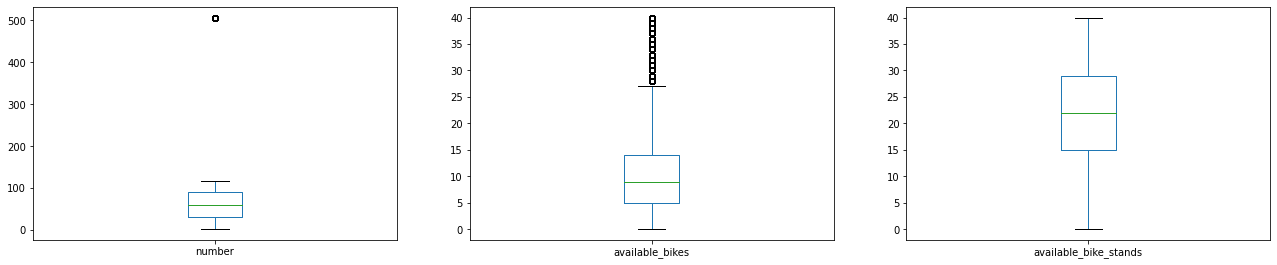

In [40]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_boxplots.pdf')

### Plot box plots individual sheet for all the continuous features

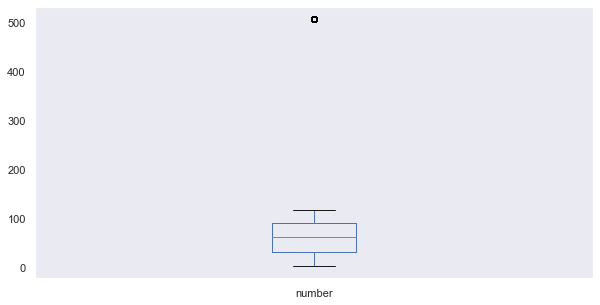

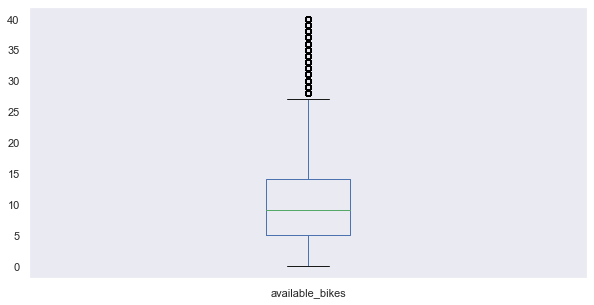

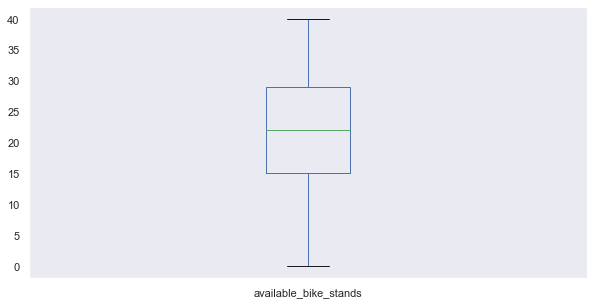

<Figure size 432x288 with 0 Axes>

In [64]:
numeric_columns = df.select_dtypes(['int64']).columns
for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,5))
    plt.show()    
    plt.savefig('BoxPlot.pdf')

### Plot bar plots individual sheet for all the categorical features

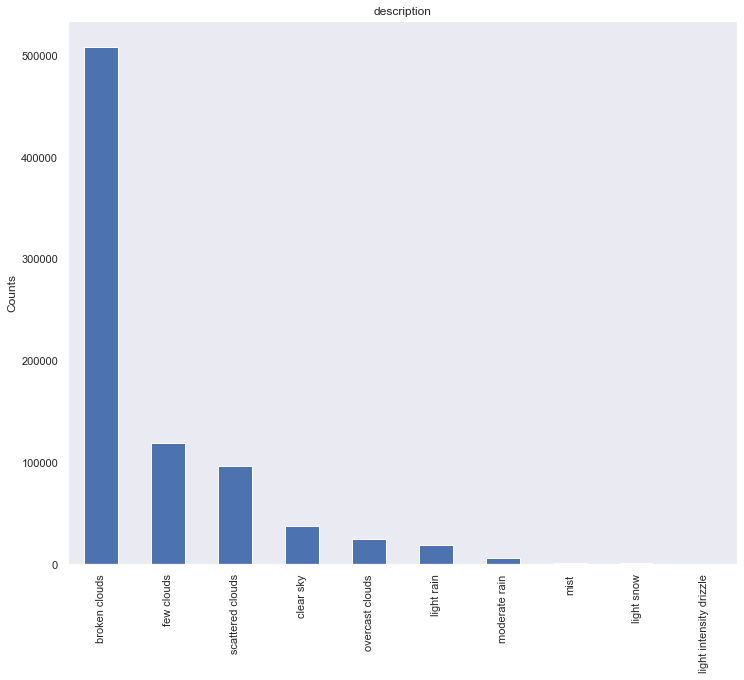

In [74]:
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    plt.title(col)
    plt.ylabel('Counts')
    plt.savefig('BarPlot.pdf')
    plt.show()


### Correlations for the numeric features

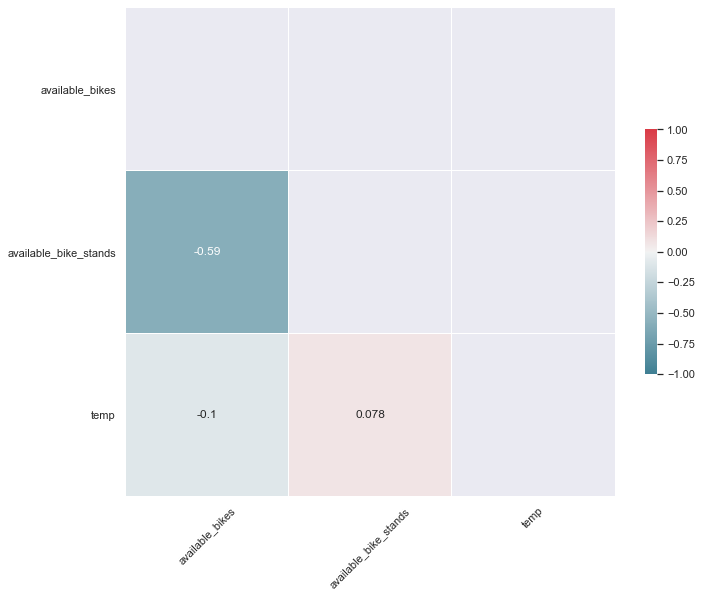

In [61]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="dark")
continuous_columns1 = [
                      'available_bikes',
                      'available_bike_stands',
                      'temp']
# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.savefig('CorrelationMatrix.pdf')